# Lec 2-3 Linear vs MLP

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

## Data Preparation

In [2]:
seed=123
np.random.seed(seed)
data=2400
X=np.random.rand(data)*10

In [3]:
Y=X

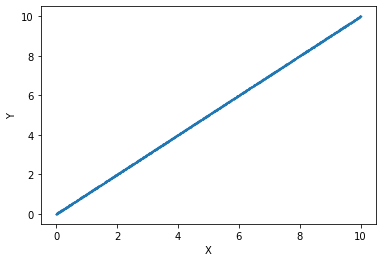

In [4]:
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X,Y,s=0.5)

### Split Dataset

In [5]:
train_x,train_y=X[:1600],Y[:1600]
val_x,val_y=X[1600:2000],Y[1600:2000]
test_x,test_y=X[2000:2400],Y[2000:2400]

In [6]:
print('length of train_x:{}'.format(len(train_x)))
print('length of val_x:{}'.format(len(val_x)))
print('length of test_x:{}'.format(len(test_x)))

length of train_x:1600
length of val_x:400
length of test_x:400


### Lec1-3의 함수들을 활용할 수 있지만, 이번 시간에는 Pytorch를 사용하여 구해봅니다.

## Model Define

In [7]:
import torch
import torch.nn as nn

class Linear(nn.Module):
    def __init__(self):
        super(Lienar,self).__init__()
        self.linear=nn.LInear(in_features=1,out_features=1,bias=True)
        
    def forward(self,x):
        x=self.linear(x)
        return x
    
class MLP(nn.Module):
    def __init__(self):
        super(MLP,self).__init__()
        self.linear1=nn.Linear(in_features=1,out_features=200,bias=True)
        self.linear2=nn.Linear(in_features=200,out_features=200,bias=True)
        self.linear3=nn.Linear(in_features=200,out_features=1,bias=True)
        self.act=nn.Sigmoid()
        
    def forward(self,x):
        x = x.view(x.size(0), -1)
        x=self.linear1(x)
        x=self.act(x)
        x=self.linear2(x)
        x=self.act(x)
        x=self.linear3(x)
        
        return x

## Parameter Check

In [8]:
model_check=MLP()

for name, param in model_check.named_parameters():
    print(f'name:{name}')
    print(type(param))
    print(f'param.shape:{param.shape}')
    print(f'param.requries_grad:{param.requires_grad}')
    print('============================================')

name:linear1.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([200, 1])
param.requries_grad:True
name:linear1.bias
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([200])
param.requries_grad:True
name:linear2.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([200, 200])
param.requries_grad:True
name:linear2.bias
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([200])
param.requries_grad:True
name:linear3.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([1, 200])
param.requries_grad:True
name:linear3.bias
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([1])
param.requries_grad:True


## Loss Function Define

In [9]:
reg_loss=nn.MSELoss()

## Train & Evaluation

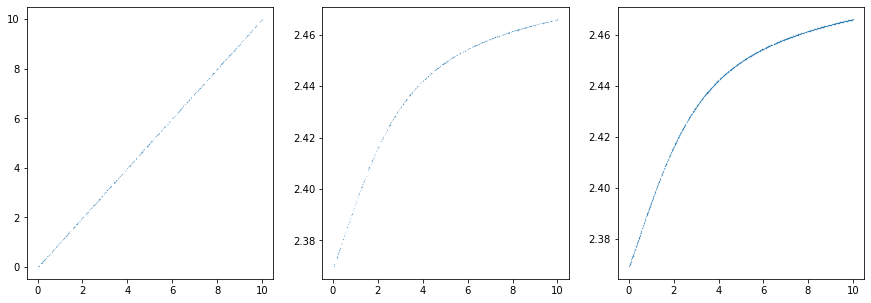

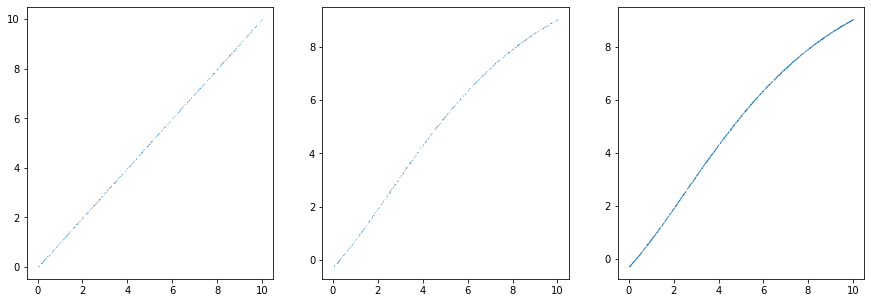

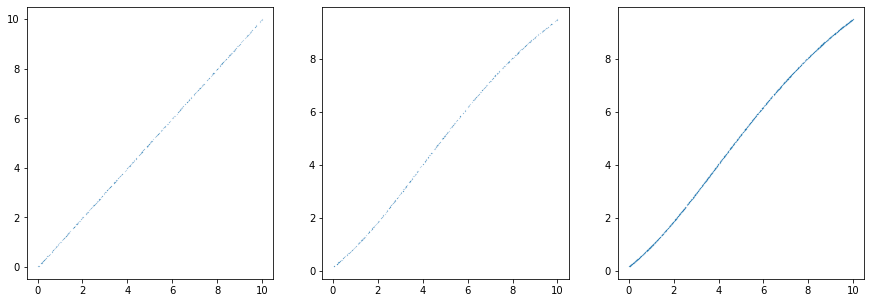

In [10]:
import torch.optim as optim
from sklearn.metrics import mean_absolute_error

# ===== Construct Model ===== #
model=MLP()

# ===== Construct Optimizer ===== #
lr=0.005
optimizer=optim.SGD(model.parameters(),lr=lr)

list_epoch=[] 
list_train_loss=[]
list_val_loss=[]
list_mae=[]
list_mae_epoch=[]

epoch = 3000 # 학습횟수 지정

for i in range(epoch):
    
    # ===== Train ===== #
    model.train()
    optimizer.zero_grad()
    input_x = torch.Tensor(train_x)
    #input_x=input_x#.view(-1,1)
    #print(input_x.shape)
    true_y = torch.Tensor(train_y)
    pred_y = model(input_x)
    #print(pred_y,pred_y.shape,true_y)
    #break
    loss = reg_loss(pred_y.squeeze(), true_y)
    loss.backward()
    optimizer.step()
    list_epoch.append(i)
    list_train_loss.append(loss.detach().numpy())
    
    # ====== Validation ====== #
    model.eval()
    optimizer.zero_grad()
    input_x = torch.Tensor(val_x)
    true_y = torch.Tensor(val_y)
    pred_y = model(input_x)   
    loss = reg_loss(pred_y.squeeze(), true_y)
    list_val_loss.append(loss.detach().numpy())
    
    
    if i%1000 ==0: # 1000번의 학습 마다 실제 데이터 분포와 예측한 데이터 분포를 그려봅니다.
        model.eval()
        optimizer.zero_grad()
        input_x = torch.Tensor(test_x)
        true_y = torch.Tensor(test_y)
        pred_y = model(input_x).detach().numpy() 
        mae = mean_absolute_error(true_y, pred_y) # sklearn 쪽 함수들은 true_y 가 먼저, pred_y가 나중에 인자로 들어가는 것에 주의합시다
        list_mae.append(mae)
        list_mae_epoch.append(i)
        
        fig = plt.figure(figsize=(15,5))
        ax1=fig.add_subplot(1,3,1)
        ax1.scatter(test_x,test_y,s=0.01)
        ax2=fig.add_subplot(1,3,2)
        ax2.scatter(test_x,pred_y,s=0.01)
        input_x=torch.Tensor(train_x)
        pred_y=model(input_x).detach().numpy()
        ax3=fig.add_subplot(1,3,3)
        #print(train_x.shape,pred_y.shape)
        ax3.scatter(train_x,pred_y,s=0.01)
        plt.show()

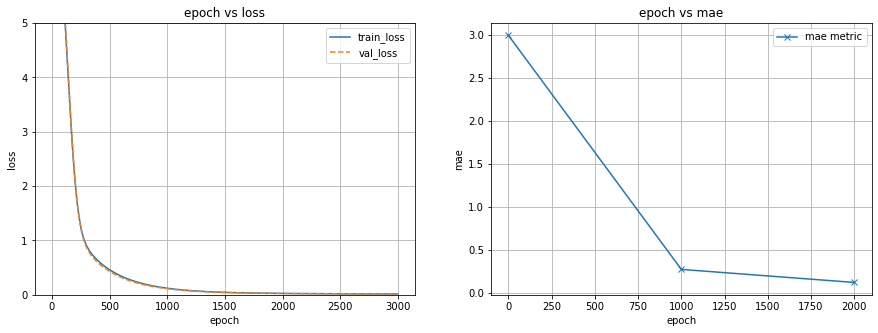

In [11]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_ylim(0, 5)
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_mae_epoch, list_mae, marker='x', label='mae metric')

ax2.set_xlabel('epoch')
ax2.set_ylabel('mae')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs mae')


plt.show()